# Pre-training vs Transfer Learning vs Fine tuning

-  Pre training(사전 학습):
  - 데이터셋을 기반으로 충분히 학습을 완료한 모델을 말한다.
- Transfer Learning(전이 학습):
  - pretrained model을 새로운 데이터셋(features, label)로 다시 학습시키는 것을 말한다.
- Fine tuning(미세 조정):  
  - Transfer Learning과는 달리 pretrained model의 일부 layer를 수정하여 새로운 데이터셋(features, label)로 다시 학습시키는 것을 말한다.

### 사전학습 모델을 사용할 수 있는 곳

- [Pytorch Pre-trained Models](https://pytorch.org/vision/stable/models.html#models-and-pre-trained-weights)
- [HuggingFace Hub](https://huggingface.co/models)
- [timm](https://github.com/huggingface/pytorch-image-models)
- [Paperswithcode](https://paperswithcode.com/)

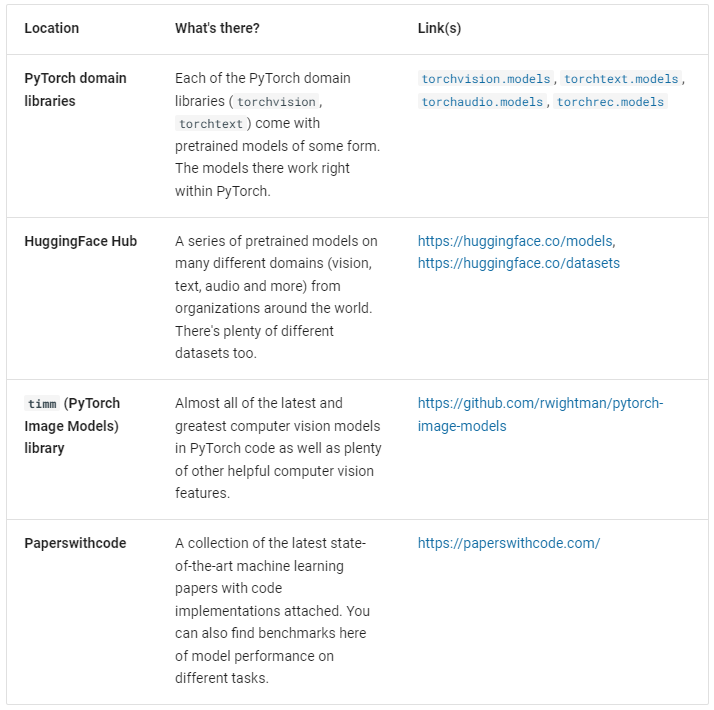

### 사전학습 모델을 고르는 기준
- 일반적으로 사전학습 모델명의 숫자가 클 수록 더 성능은 뛰어나지만, 무거운 모델이라고 생각하면 된다.    

- 따라서 작업해야 하는 컴퓨터 파워를 생각해서 가장 알맞는 사전학습 모델을 선택하는 것이 좋은 방법이다.

## 전이학습

> 이미 학습을 한 모델을 이용하여 모델링을 하는 방법   

모델을 학습시키려면, 많은 데이터, 시간, 돈, 노력 등이 필요하며, 이런 조건들을 갖추고 있는 회사는 많지 않다.   
검증(신뢰)된 `Transfer Learning(전이학습)` 모델들을 제공함으로써 좀더 쉽게 모델링을 할 수 있도록 도와준다.

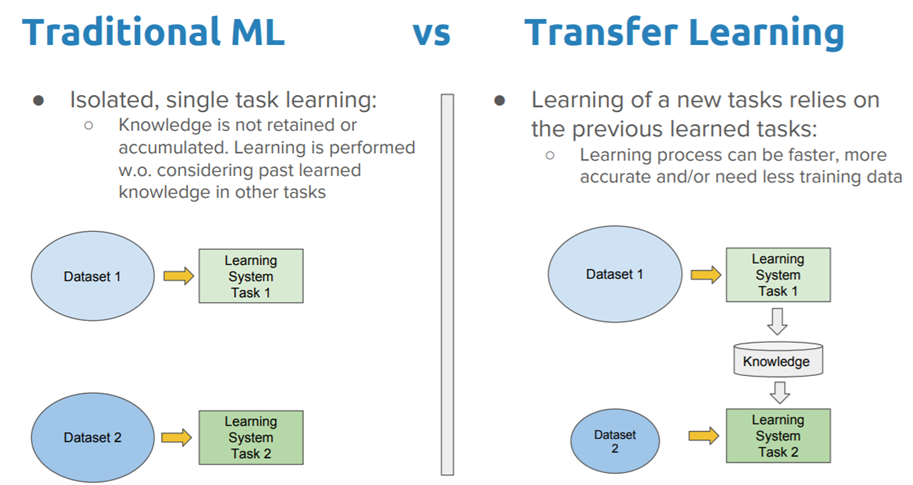

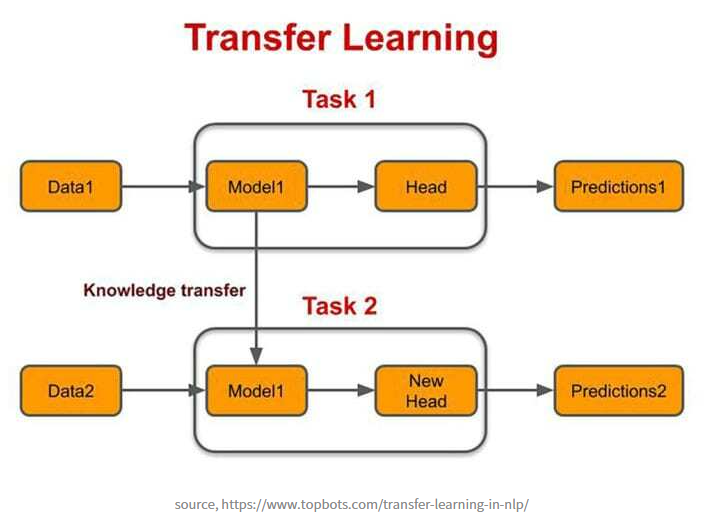

아래는 전이학습 모델을 적용한 사례이다.
1. 서로다른 Object를 구분하는 모델을 이용하여 스테이크, 피자, 스시를 구분하는 모델을 학습시킨 경우
2. NLP를 이용하여 스펨을 구분할 수 있는 모델을 학습시킨 경우

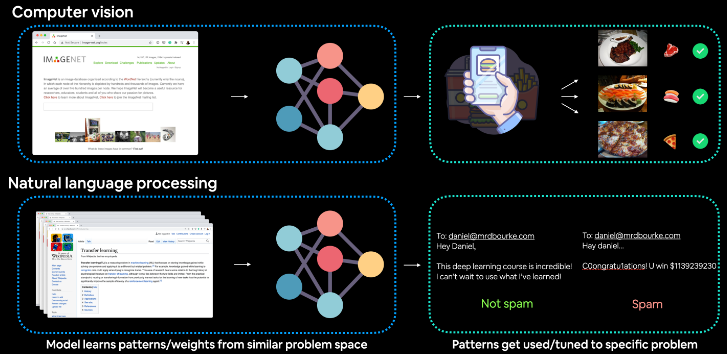

## Fine Tuning 전략

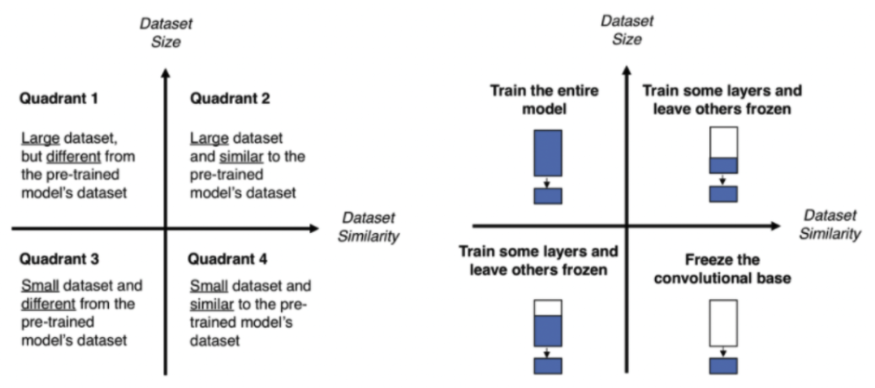

데이터셋의 크기와 이 데이터셋이 Pre-trained model이 기존에 학습한 데이터셋과 얼마나 유사한지에 따라 전략이 달라진다.

1. 우리 데이터셋이 크고, 유사성이 작다.
  - 모델 전체를 학습시키는 것이 낫다.   
  > 데이터셋의 크기가 크기 때문에 충분히 학습이 가능하기 때문. 유사성이 작다고 해서 모델의 구조와 파라미터들은 여전히 재사용 가능하므로, 모델 전체를 학습 시켜주는 편이 낫다.
2.  우리 데이터셋이 크고, 유사성이 크다.
  - Pre-trained Model의 일부분과 Classifier를 학습시킨다.   
  > 사실 최적의 경우이기 때문에 모든 옵션을 선택할 수 있지만, 데이터셋이 유사하기 때문에 전체를 학습시켜도 괜찮지만, 강한 feature가 나타나는 Pre-trained Model의 뒷부분과 Classifier만 새로 학습시키는 것이 최적이다.
3. 우리 데이터셋이 작고, 유사성이 작다.
  - Pre-trained Model의 일부분과 Classifier를 학습시킨다.    
  > 가장 나쁜 상황. 데이터가 적기 때문에 적은 레이어를 Fine tuning하면 별 효과가 없고, 많은 레이어를 Fine tuning했다가는 오히려 오버피팅이 발생할 것이다. 따라서 Pre-trained Model의 어느 정도를 새로 학습시켜야 할지를 적당히 잡아주어야 한다.
4. 우리 데이터셋이 작고, 유사성이 크다.
  - Classifier만 학습시킨다.    
  > 데이터가 적기 때문에 많은 레이어를 Fine tuning할 경우 오버피팅이 발생한다. 따라서 앞부분의 Feature Extraction은 그대로 쓰고, 최종 Classifier의 FC Layer들에 대해서만 Fine tuning을 진행한다.


# Global Variables

In [2]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [3]:
import easydict
args = easydict.EasyDict()

args.default_path = "/content/data/MyDrive/AI_study/2. Deep Learning/2. Vision Pytorch/"
args.train_dir = args.default_path+ "data/pizza_steak_sushi/train"
args.test_dir = args.default_path+ "data/pizza_steak_sushi/test"


# Import

In [4]:
import sys

sys.path.append(args.default_path)

In [5]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/data/MyDrive/AI_study/2. Deep Learning/2. Vision Pytorch/']

In [6]:
from service import data_setup, engine

In [7]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    # assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    # assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

from torch import nn
from torchvision import transforms

torch version: 2.4.0+cu121
torchvision version: 0.19.0+cu121


In [8]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [9]:
import matplotlib.pyplot as plt

import random
from PIL import Image
from pathlib import Path # 파일 패스 모듈

In [10]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


In [11]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        transform: torchvision.transforms,
                        image_size: Tuple[int, int] = (224, 224),
                        device: torch.device="cpu"):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor()
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);
    return target_image_pred_probs.max()

# device

In [12]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# [EfficientNet](https://hoya012.github.io/blog/EfficientNet-review/)


## EfficientNet 설명
- 한정된 자원으로 최대의 효율을 내기 위한 방법으로 model scaling(depth, width, resolution)의 크기를 조절합니다.      
- 기존에는 이 세 가지를 수동으로 조절하였다면, EfficientNet은 model scaling 방법으로 compound scaling 방법을 제안하였습니다.      
- 이 방법을 통해 기존 ConvNet보다 8.4배 작으면서, 6.1배 빠르고 더 높은 정확도를 갖습니다.

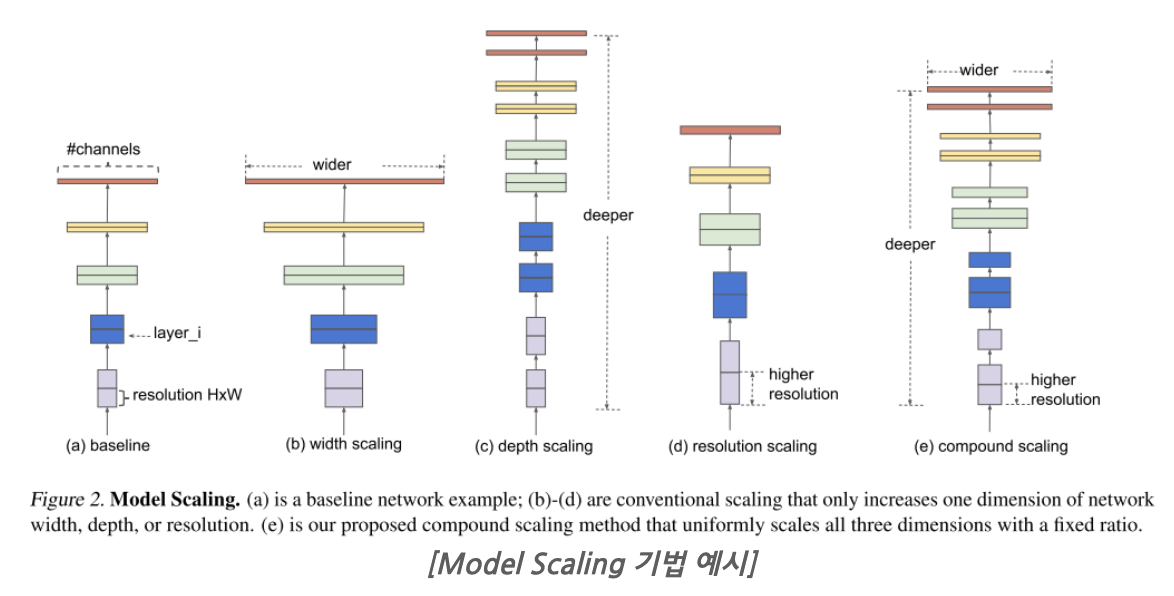

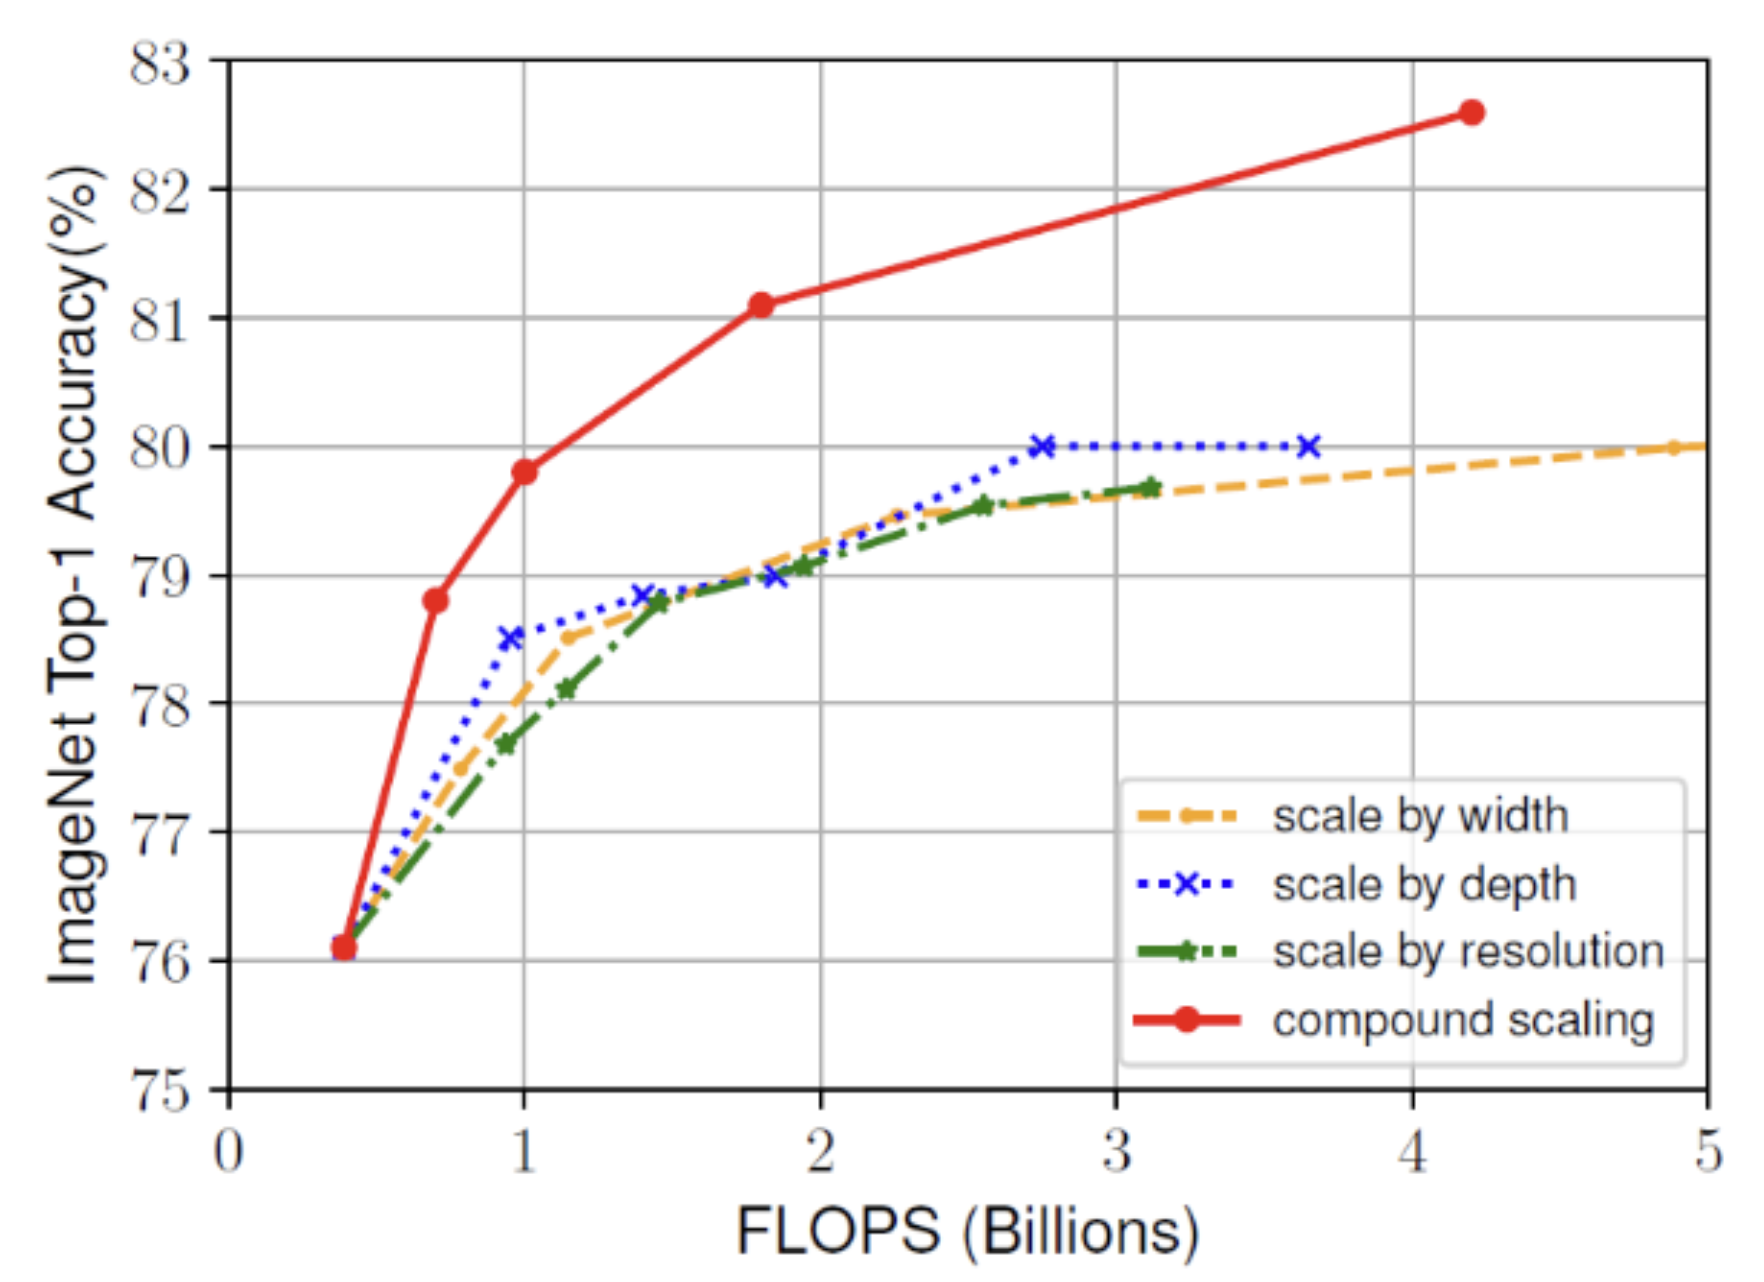

## Pre-training

### [weights](https://pytorch.org/vision/main/models.html)

In [13]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

### transforms

In [14]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

#### Dataset & DataLoader

In [15]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=args.train_dir,
                                                                               test_dir=args.test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7abff616a5f0>,
 ['pizza', 'steak', 'sushi'])

### [model](https://pytorch.org/vision/main/models/efficientnet.html)

- [오류 해결 방법](https://github.com/pytorch/vision/issues/7744)
> `RuntimeError: invalid hash value (expected "3dd342df", got "7f5810bc96def8f7552d5b7e68d53c4786f81167d28291b21c0d90e1fca14934")`

In [16]:
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)

WeightsEnum.get_state_dict = get_state_dict

In [17]:
# 사전학습(pre-training) 모델 인스턴스 생성
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 102MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

torchvision.models.efficientnet_b0에 대한 설명
- `features`: A collection of layers
- `avgpool`: features layers의 결과값을 평균하여 feature vector로 변환
- `classifier`: feature vector를 최종 결과를 나타내는 output classes vector로 변환

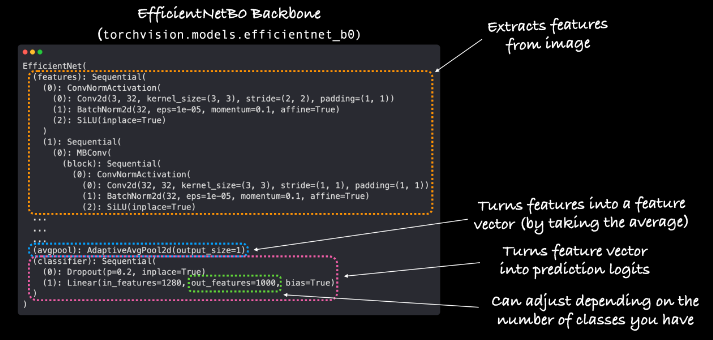

#### Summary

In [18]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        # trainable -> requires_grad
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

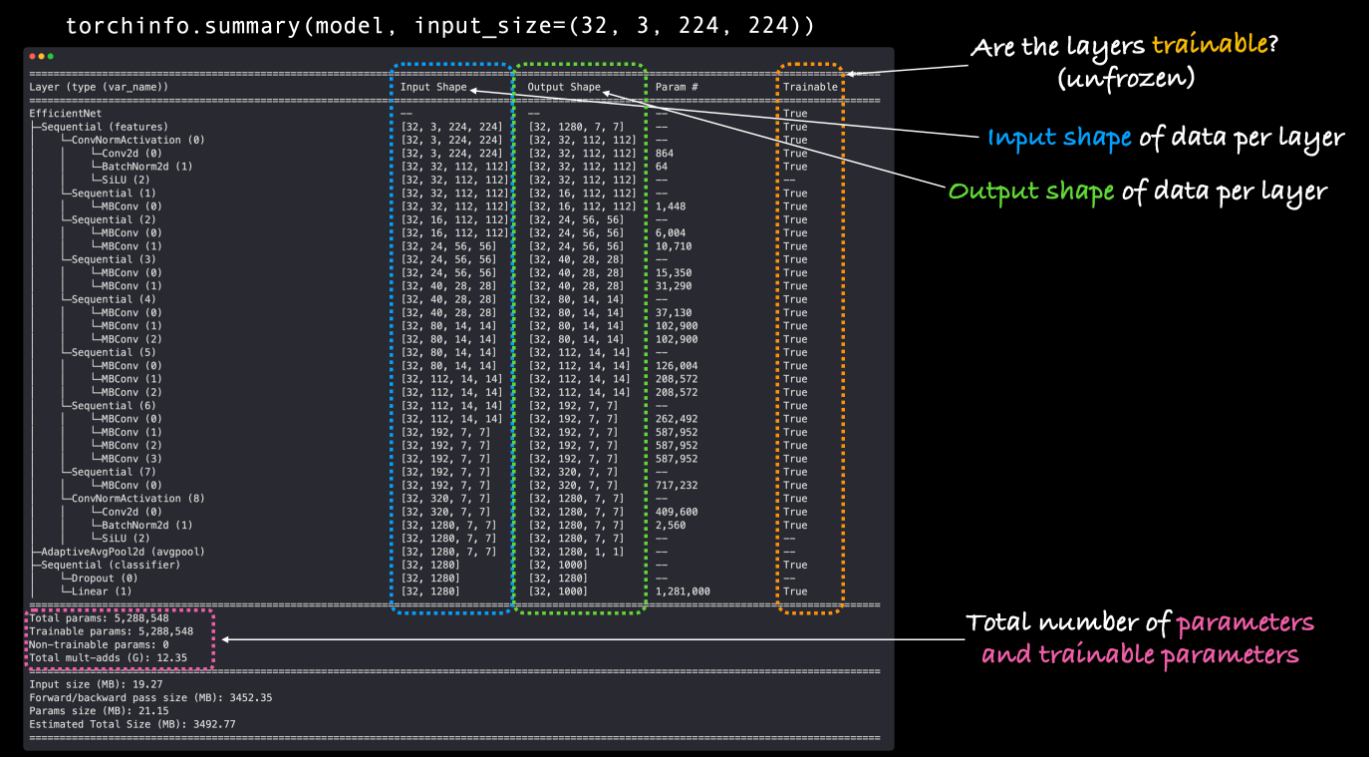

## Fine Tuning

### output layer 변경
- 학습용 layers들은 고정을하여 더 이상 학습을 하지 않도록 하고, 마지막 결과를 내보내는 output layer만 추가 학습을 시켜 변경시키는 방법     

- The process of transfer learning usually goes: freeze some base layers of a pretrained model(typicall the `features` section) and then adjust the output layers (also called head/classifier layers) to suit your needs.

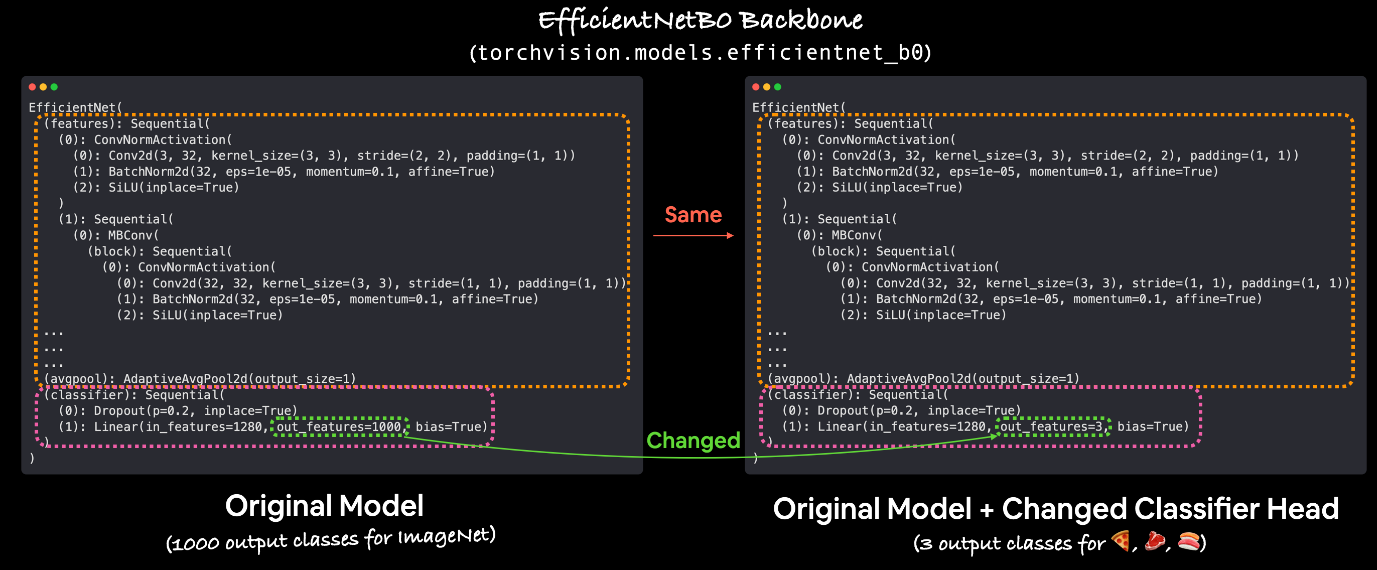

features의 layers는 더이상 학습을 하지 않도록 고정!

In [19]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

In [20]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        # trainable -> requires_grad
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

기존 `classifier`는 1000개의 사물을 구분하게 하는 로직이다.

```python
(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=True)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
```

이것을 pizza, steak, sushi를 구분할 수있게 수정하고 학습을 시키면 된다.

In [21]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### Summary

In [22]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

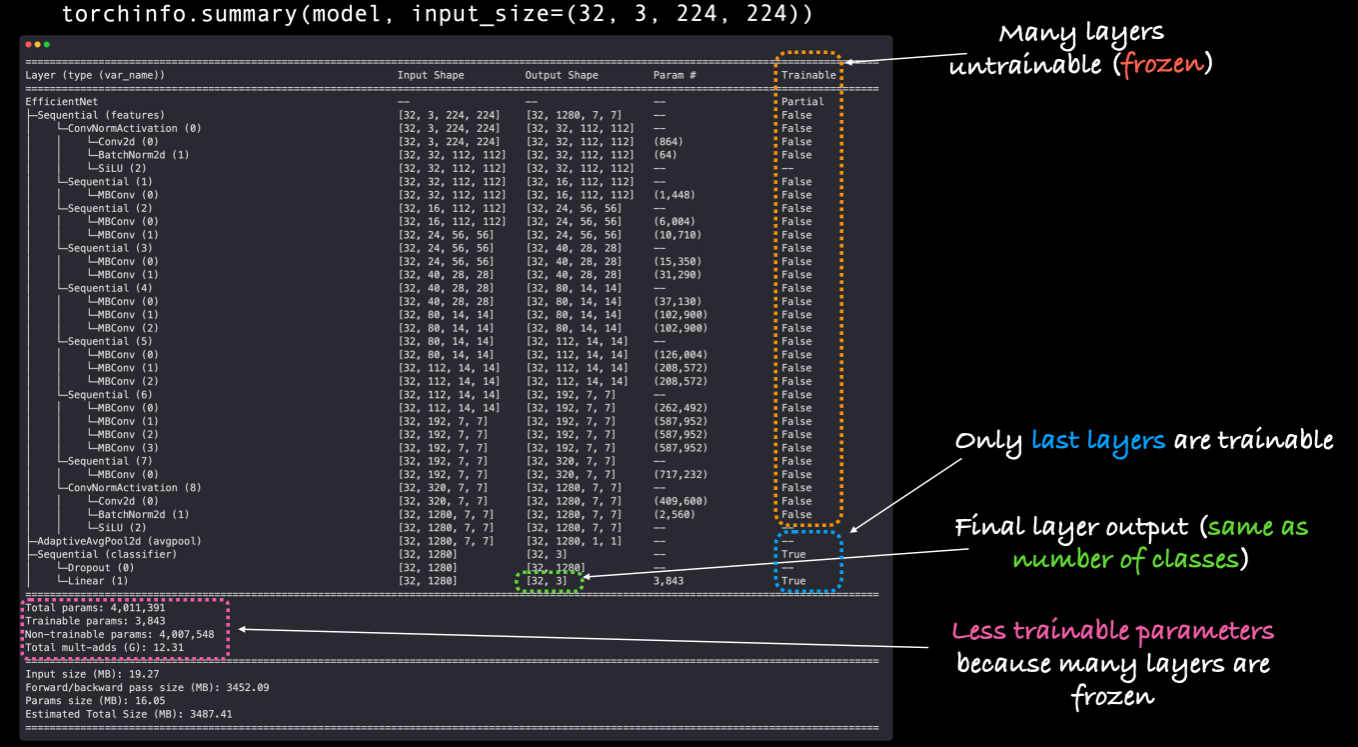

Let's go through them:
- `Trainable column`: feature layers는 변경되지 않고 학습에 대한 부분만(requires_grad=False) 변경되었다.  
- `Output shape of classifier`: 결과 모양이 `[32, 1000]`에서 `[32, 3]`으로 변경되었다. 또한 학습을 진행하는 것으로 표현되어 있다.
- `Less trainable parameter`: 기존 학습용 파라미터 수가 5,288,548에서 4,007,548로 줄어들었다.

### Training

In [23]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

### Plotting loss curves

In [ ]:
# Plot the loss curves of our model
plot_loss_curves(results)

### Make predictions

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(args.test_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224),
                        device=device)

# [MobileNet](https://wikidocs.net/164799)
- MobileNet 모델의 key idea는 Depth-wise Separable Convolution을 통해 연산량을 줄였습니다.    
- 따라서 다른 기존 모델보다 layers는 많지만 전체 연산량을 획기적으로 줄임으로써 고성능이 아닌 환경에서도 작동할 수 있는 알고리즘입니다.

## MobileNet의 필요성

### 고성능의 환경
데이터 센터 환경에서는 고성능의 CPU가 매우 많이 있기 때문에 연산 처리 성능이 매우 고성능이고, 고성능의 그래픽 카드(GPU) 다수를 가지고 있을 수 있으며, 메모리도 대용량을 사용할 수 있습니다. 또한 전력 공급이 지속적으로 이루어지기 때문에 전원을 아끼기 위해 성능을 낮추는 것 보다는 더 높은 퍼포먼스에 초점을 두는 경우가 많습니다.

이런 컴퓨터 환경에서는 어떤 모델을 넣더라도 잘 작동을 할 것입니다.

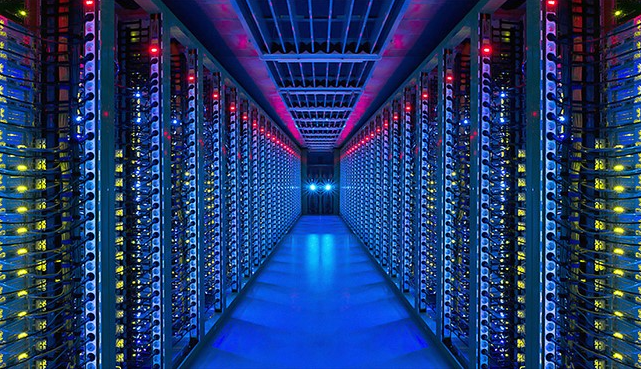

### 고성능이 아닌 환경
실생활에서 사용하는 AI 서비스들은 데이터 센터 또는 슈퍼 컴퓨터보다는 자동차, 드론, 스마트폰과 같은 환경에서 잘 작동이 되어야 하는 경우가 많아지고 있습니다.    

이런 저성능의 환경에서 잘 작동할 수 있으며, 성능도 보장이되어야 하는 요구들이 늘어나면서 `딥러닝 모델 경량화(MobileNet)` 알고리즘이 발전하게 되었습니다.

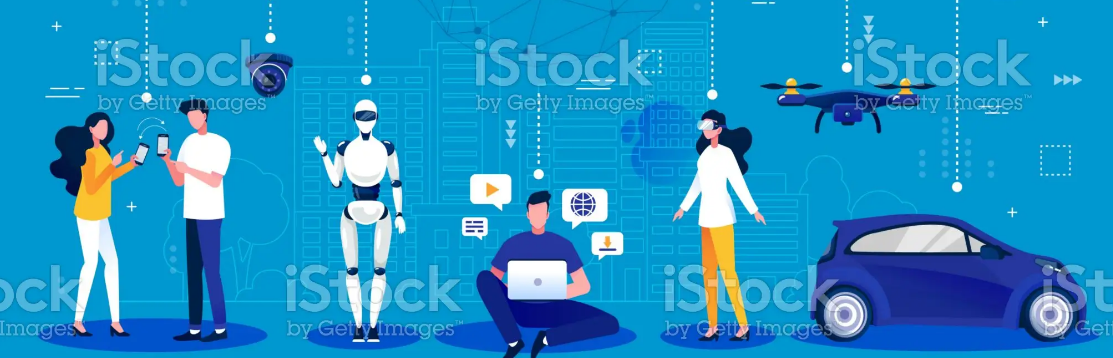

## MobileNet 설명

### CNN(Standard Convolution) 연산량

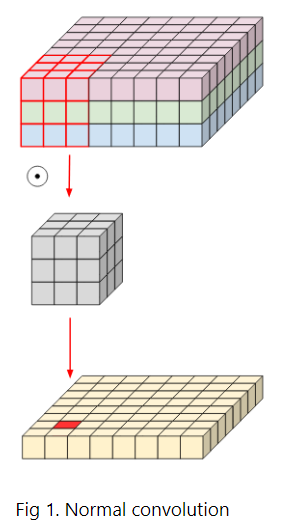

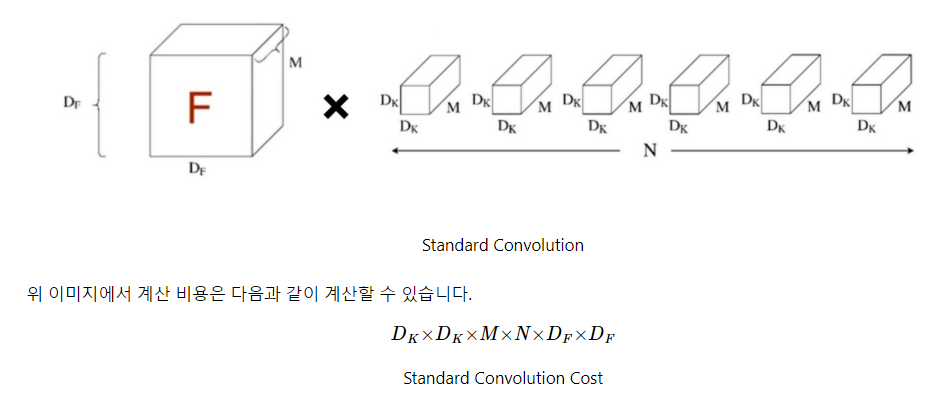

### MobileNet(Depth-wise Separable Convolution) 연산량

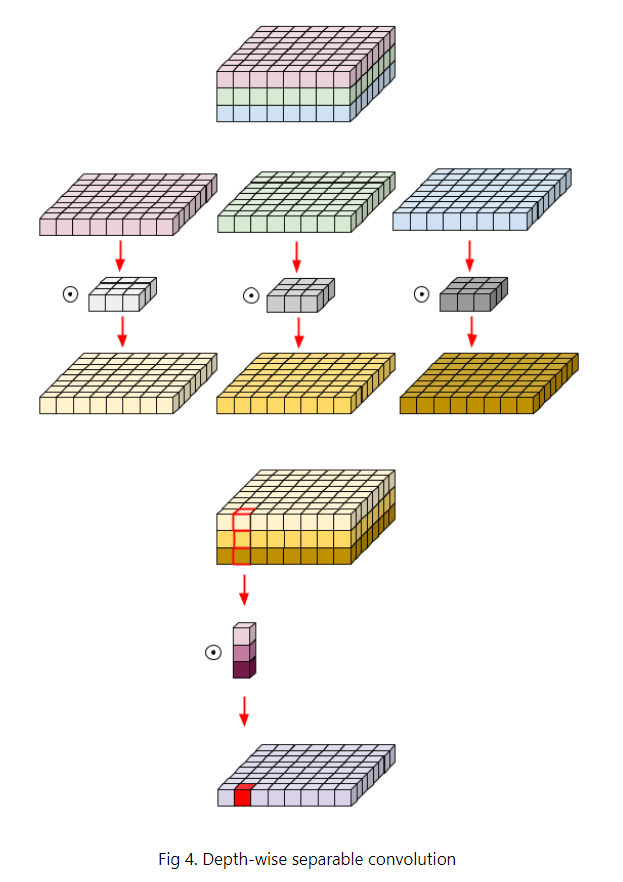

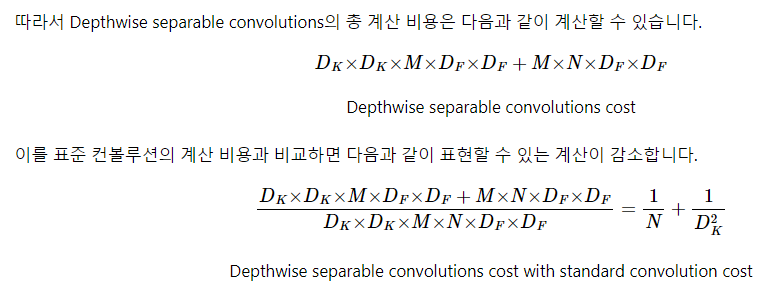

- Depthwise Convolution 연산량

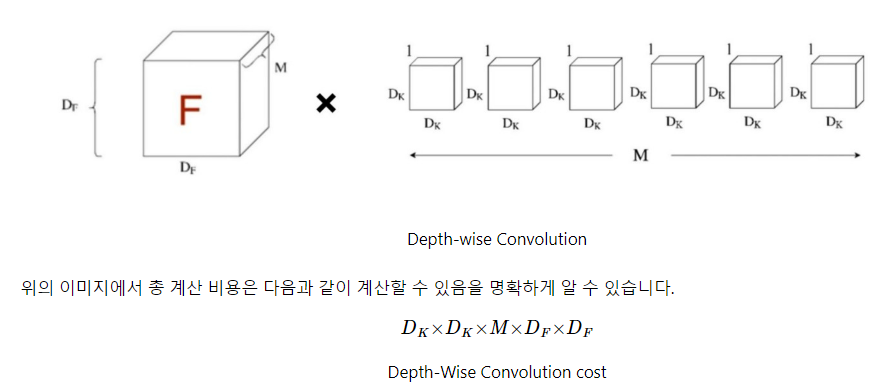

- Pointwise Convolution 연산량

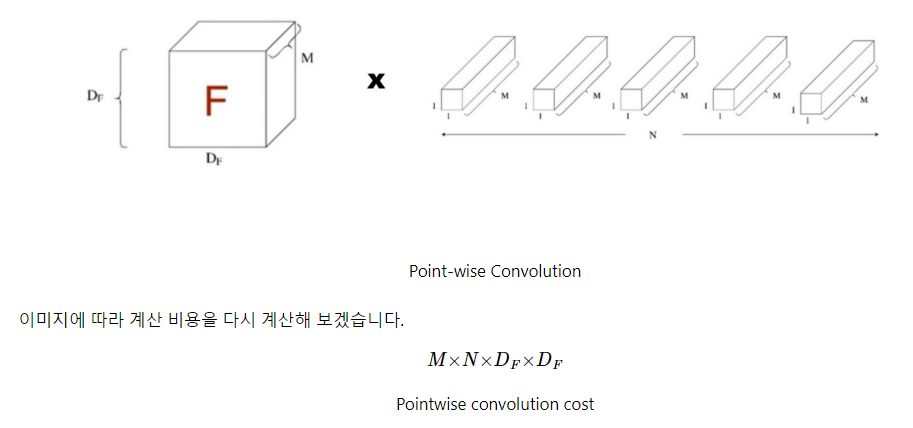

### MobileNet과 다른 알고리즘과 효율 비교

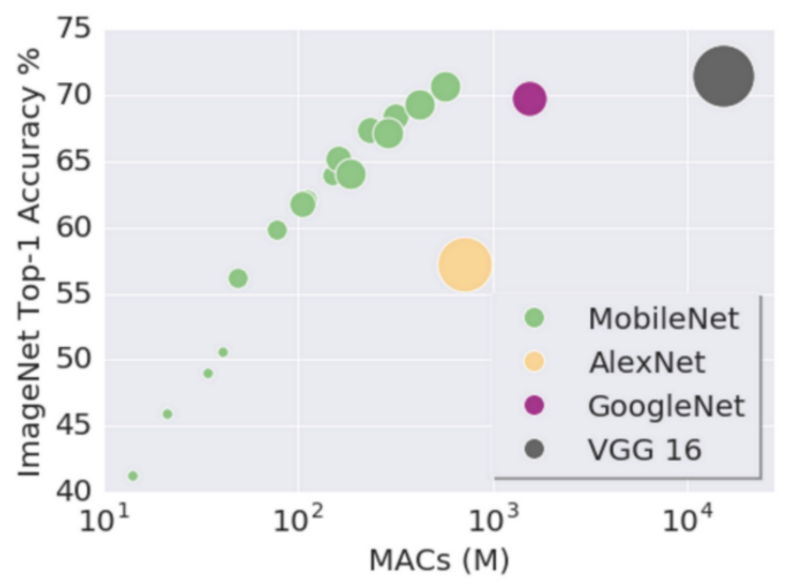

## Pre-training

### [weights](https://pytorch.org/vision/main/models.html)

In [ ]:
weights = torchvision.models.MobileNet_V3_Small_Weights.DEFAULT
weights

### transforms

In [ ]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

#### Dataset & DataLoader

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=args.train_dir,
                                                                               test_dir=args.test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

### [model](https://pytorch.org/vision/main/models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.mobilenet_v3_small)

In [ ]:
model = torchvision.models.mobilenet_v3_small(weights=weights).to(device)
model

#### Summary

In [ ]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

## Fine Tuning

### output layer 변경

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=576,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

### Summary

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
epochs = 3

for epoch in tqdm(range(epochs)):
    #################################################################
    ### Training Loop(dataloader) -> 모델 학습
    #################################################################
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        y_pred = model(X.to(device))
        loss = loss_fn(y_pred, y.to(device))
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    #################################################################
    ### Testing Loop -> 모델 평가
    #################################################################
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        proba = []
        for X, y in test_dataloader:
            test_pred = model(X.to(device))
            test_loss += loss_fn(test_pred, y.to(device))
            pred_probab = nn.Softmax(dim=1)(test_pred)
            proba.extend(pred_probab.argmax(dim=1).cpu().numpy())

    ## Print out what's happening
    epoch_count.append(epoch)


In [ ]:
torch.tensor(proba)

### Training

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


In [ ]:
results

### Plotting loss curves

In [ ]:
# Plot the loss curves of our model
plot_loss_curves(results)

### Make predictions

In [ ]:
# # Get a random list of image paths from test set
# import random
# num_images_to_plot = 3
# test_image_path_list = list(Path(args.test_dir).glob("*/*.jpg")) # get list all image paths from test data
# test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
#                                        k=num_images_to_plot) # randomly select 'k' image paths to pred and plot
# proba = []
# # Make predictions on and plot the images
# for image_path in test_image_path_sample:
#     add = pred_and_plot_image(model=model,
#                         image_path=image_path,
#                         class_names=class_names,
#                         transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
#                         image_size=(224, 224),
#                         device=device)
#     proba.append(add)

In [ ]:
!pip install torchmetrics

In [ ]:
import os
import pathlib
from PIL import Image
from pathlib import Path

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.classes, self.class_to_idx = self.__find_classes(targ_dir)
        self.transform = transform

    def __find_classes(self, directory: str):
        # 1. Get the class names by scanning the target directory
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

        # 2. Raise an error if class names not found
        if not classes:
            raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

        # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

    def __load_image(self, index: int):
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)


    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)


    def __getitem__(self, index: int):
        "Returns one sample of data, data and label (X, y)."
        img = self.__load_image(index)
        class_name  = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

test_dataset = ImageFolderCustom(targ_dir=args.test_dir,
                                     transform=auto_transforms)

In [ ]:
test_targets = []
for features, target in test_dataset:
    test_targets.append(target)

In [ ]:
pred_probab

In [ ]:
pred_probab.shape, torch.tensor(test_targets).shape

In [ ]:
test_dataloader.dataset

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=torch.tensor(proba),
                        target=torch.tensor(test_targets))

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);